This is a jupyter notebook I wrote for a group project in one of my UNCW Data Science classes. The project tested simgle image segmentation on this Intel Image Classification kaggle project https://www.kaggle.com/puneet6060/intel-image-classification. I adapted an existing model someone had posted (https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur), but the segmentation was all original work.

The code splits the test and train images into a 3x3 grid. The model is trained on segments of the images and evaluated on segments of the test images. Three different methods are tested for combining scores from the 3x3 grid of image segments to classify the entire image.

In [1]:
import os 
import cv2   
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np  
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from IPython.display import SVG
from scipy.stats import mode


In [2]:
#Load the data
# Adapted from https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    class_labels = {'buildings': 0,
                    'forest' : 1,
                    'glacier' : 2,
                    'mountain' : 3,
                    'sea' : 4,
                    'street' : 5
                    }
    for label in os.listdir(directory):
        
        for image_file in os.listdir(directory+label): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+label+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(class_labels[label])
    
    return shuffle(Images,Labels,random_state=412345) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('./seg_train/seg_train/') #Extract the training images from the folders.

X_train = np.array(Images, dtype = 'float32') #converting the list of images to numpy array.
y_train = np.array(Labels, dtype = 'int32')


seg_x = []
seg_y = []

for image in X_train:
    seg_x.append(image[:50,:50,:])
    seg_x.append(image[:50,50:100,:])
    seg_x.append(image[:50,100:150,:])
    seg_x.append(image[50:100,:50,:])
    seg_x.append(image[50:100,50:100,:])
    seg_x.append(image[50:100,100:150,:])
    seg_x.append(image[100:,:50,:])
    seg_x.append(image[100:,50:100,:])
    seg_x.append(image[100:,100:150,:])

for label in y_train:
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    seg_y.append(label)
    
    
seg_x = np.array(seg_x)
seg_y = np.array(seg_y)
seg_x = seg_x/(seg_x.max()) #Scale data

In [6]:
seg_x.shape

(126306, 50, 50, 3)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (50, 50, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(seg_x, seg_y, batch_size=128, epochs=5, validation_split = 0.2)

Train on 101044 samples, validate on 25262 samples
Epoch 1/5
101044/101044 [==============================] - 188s 2ms/sample - loss: 1.2470 - acc: 0.4911 - val_loss: 1.0754 - val_acc: 0.5690
Epoch 2/5
101044/101044 [==============================] - 185s 2ms/sample - loss: 1.0544 - acc: 0.5809 - val_loss: 1.0052 - val_acc: 0.5969
Epoch 3/5
101044/101044 [==============================] - 185s 2ms/sample - loss: 0.9786 - acc: 0.6132 - val_loss: 0.9784 - val_acc: 0.6114
Epoch 4/5
101044/101044 [==============================] - 185s 2ms/sample - loss: 0.9247 - acc: 0.6344 - val_loss: 0.9492 - val_acc: 0.6246
Epoch 5/5
101044/101044 [==============================] - 185s 2ms/sample - loss: 0.8807 - acc: 0.6533 - val_loss: 0.9162 - val_acc: 0.6390


In [3]:
test_images, test_labels = get_images('./seg_test/') #Extract the test images from the folders.

X_test = np.array(test_images, dtype = 'float32') #converting the list of images to numpy array.
y_test = np.array(test_labels, dtype = 'int32')


segtest_x = []
segtest_y = []

for image in X_test:
    segtest_x.append(image[:50,:50,:])
    segtest_x.append(image[:50,50:100,:])
    segtest_x.append(image[:50,100:150,:])
    segtest_x.append(image[50:100,:50,:])
    segtest_x.append(image[50:100,50:100,:])
    segtest_x.append(image[50:100,100:150,:])
    segtest_x.append(image[100:,:50,:])
    segtest_x.append(image[100:,50:100,:])
    segtest_x.append(image[100:,100:150,:])

for label in y_test:
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    
    
segtest_x = np.array(segtest_x)
segtest_y = np.array(segtest_y)
segtest_x = segtest_x/(segtest_x.max()) #Scale data

In [8]:
model.evaluate(segtest_x,segtest_y)

27000/27000 [==============================] - 23s 846us/sample - loss: 0.9724 - acc: 0.6326


[0.972429204305013, 0.6325926]

In [8]:
predictions = model.predict(segtest_x)

In [16]:
#Accuracy scores for the grid positions
pred_class = np.argmax(predictions, axis=1)

grid_class = pred_class.reshape((3000,3,3))
grid_label = segtest_y.reshape((3000,3,3))
grid_score = np.sum(grid_class==grid_label, axis=0)/y_test.shape[0]
grid_score

array([[0.59366667, 0.58966667, 0.58833333],
       [0.689     , 0.71033333, 0.69033333],
       [0.591     , 0.60166667, 0.59266667]])

In [5]:
#Predict Complete Image class by combining grid sub-image 
pred_mode=[]
pred_top=[]
pred_weighted=[]

for i in range(3000):
    lower = i*9
    upper = lower+9
    image_pred = predictions[lower:upper][:] #Every 9 images make up a complete test image
    
    pred_label = np.argmax(image_pred, axis = 1) #Index of largest probability gives the class
    pred_mode.append(mode(pred_label)[0][0]) #Add mode class of 9 piece (3x3) grid
    
    top_index = np.unravel_index(np.argmax(image_pred, axis=None), image_pred.shape) #Get index (tuple) of largest prob. in grid
    pred_top.append(top_index[1]) #Add index position that determines class
    
    all_seg = np.sum(image_pred, axis=0) #Sum all of the class probabilities between the grid pieces
    pred_weighted.append(np.argmax(all_seg)) #Take the class index of the largest probability

pred_mode = np.array(pred_mode)
pred_top = np.array(pred_top)
pred_weighted = np.array(pred_weighted)

In [6]:
score_mode = np.sum(pred_mode==y_test)/y_test.shape[0]
score_top = np.sum(pred_top==y_test)/y_test.shape[0]
score_weighted = np.sum(pred_weighted==y_test)/y_test.shape[0]
print("score_mode =",score_mode)
print("score_top =",score_top)
print("score_weighted =",score_weighted)

score_mode = 0.7573333333333333
score_top = 0.7556666666666667
score_weighted = 0.7946666666666666


In [13]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, pred_weighted)
print(conf_mx)

[[272   5   4  17  11 128]
 [  0 453   0   8   1  12]
 [  1   2 419 104  20   7]
 [  2   3  65 424  29   2]
 [  8   7  36  59 384  16]
 [ 41   8   2  10   8 432]]


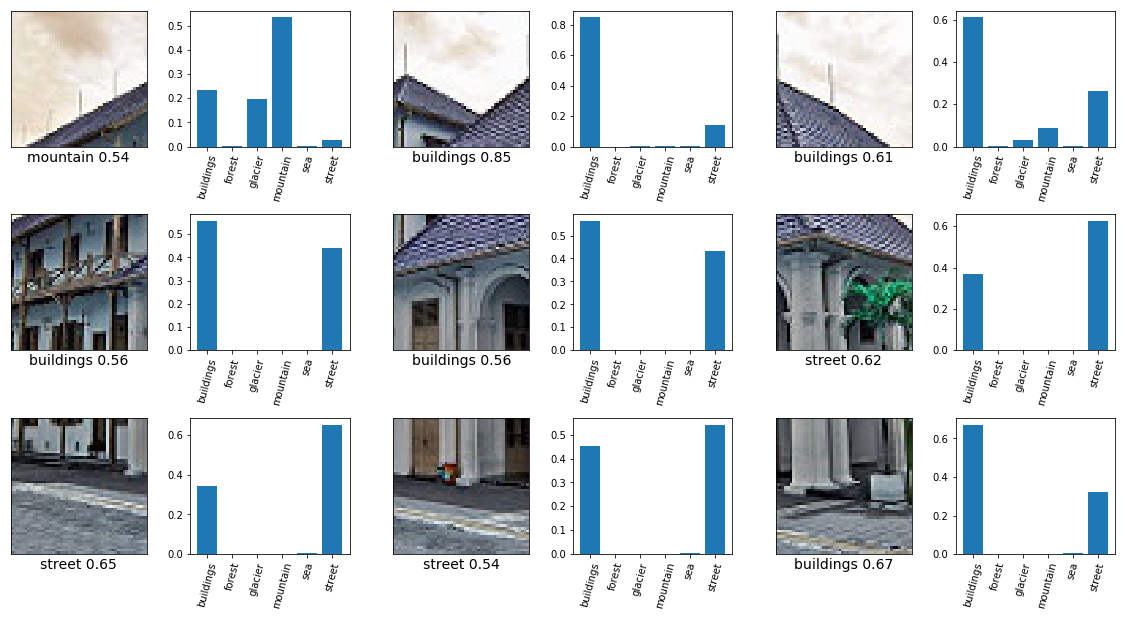

In [16]:
classes = ['buildings','forest','glacier','mountain','sea','street']
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,6,(2*i)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(segtest_x[i])
    image_label = get_classlabel(np.argmax(image_pred, axis=1)[i])
    top_value = np.max(image_pred, axis=1)[i]
    display = image_label+f"{top_value:5.2}"
    plt.xlabel(display, fontsize=14)
    plt.subplot(3,6,(2*i)+2)
    plt.bar(classes,image_pred[i])
    plt.xticks(classes, classes, rotation=75)
    
plt.subplots_adjust(hspace=0.5)
plt.show()